### MovieLens 20M

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ratings = pd.read_csv('../../data/20m_raw/ratings.csv')
movies = pd.read_csv('../../data/20m_raw/movies.csv')

Movies dataframe contains a separate entry for each movie in the dataset ofering 3 attributes:
- **id**
- movie **title**
- a list of **genres**

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movies_no = len(movies)
print("Total number of movies = {0}".format(movies_no))

Total number of movies = 27278


Ratings dataframe contains 20 millions ratings. Each rating has 4 attributes:
- **userId**: the unique identifier of the user who offered the movie rating
- **movieId**: the unique identifier of the rated movie
- **rating**: a numeric value from 0.5 to 5 stars with half-star increment
- **timestamp**: defines the datetime when the movie was rated

In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [6]:
ratings_no = len(ratings)
print("Total number of ratings = {0}".format(ratings_no))

Total number of ratings = 20000263


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffcd5d67630>]],
      dtype=object)

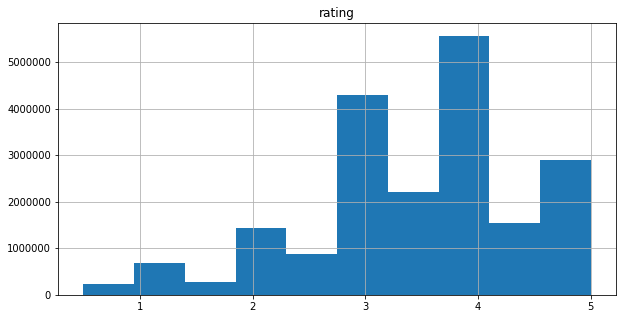

In [7]:
ratings.hist(column='rating', figsize=(10,5))


In [8]:
print("Average rating = {0}".format(ratings['rating'].mean()))

Average rating = 3.5255285642993797


In [9]:
print("Average number of ratings per movie = {0}".format(ratings_no/movies_no))

Average number of ratings per movie = 733.2012244299435


In [3]:
nr_ratings_per_movie = ratings.groupby("movieId").size().reset_index(name='counts').sort_values('counts', ascending=False)
print("Number of ratings per movie:\n", nr_ratings_per_movie)
less_than_3_ratings = nr_ratings_per_movie[nr_ratings_per_movie['counts']<3]
print("\nNumber of movies that have less than 3 ratings: ", len(less_than_3_ratings))

Number of ratings per movie:
        movieId  counts
293        296   67310
352        356   66172
315        318   63366
587        593   63299
476        480   59715
...        ...     ...
23146   110807       1
23148   110811       1
15481    78984       1
23150   110818       1
26743   131262       1

[26744 rows x 2 columns]

Number of movies that have less than 3 ratings:  6015


There are 6015 that have less a total of 1 or 2 reviews. When training the Word2Vec model, these movies are going to be removed from the vocabulary.

In [10]:
len(nr_ratings_per_movie[nr_ratings_per_movie['counts']>2])

20729